# K Means Clustering

###  import libraries

In [1071]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

### import dataset

In [1072]:
df=pd.read_csv('/Users/gulcanogundur/Downloads/Wholesale customers data.csv',sep=",",encoding = 'unicode_escape')

In [1073]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [1074]:
df.shape

(440, 8)

In [1075]:
df['Region'].replace([1,2,3],['Lisbon','Oporto','other'],inplace=True)

In [1076]:
df['Channel'].replace([1,2],['Horeca','Retail'],inplace=True)

In [1077]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844
3,Horeca,other,13265,1196,4221,6404,507,1788
4,Retail,other,22615,5410,7198,3915,1777,5185


In [1078]:
#print (df['Fresh'].groupby(['Region']).median())
df.groupby("Region")["Fresh"].median()

Region
Lisbon    7363.0
Oporto    8090.0
other     8752.5
Name: Fresh, dtype: float64

# EDA

In [1079]:
print('Descriptive Statastics of our Data:')
df.describe()

Descriptive Statastics of our Data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Show Meta Data

In [1080]:
print('Showing Meta Data :')
df.info()

Showing Meta Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


###  Check for null values for each column

Text(0.5,1,'Ratio of missing values per columns')

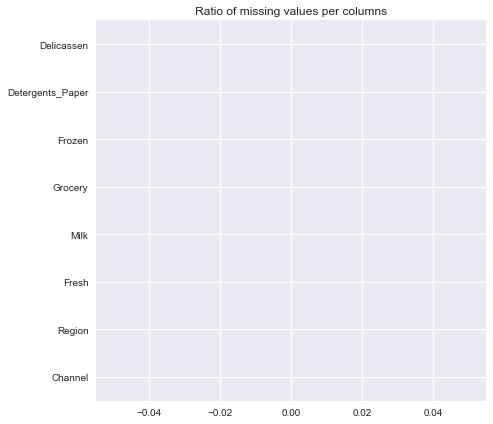

In [1081]:
plt.figure(figsize=(7, 7))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [1082]:
pd.isnull(df).sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [1083]:
df[df.isnull().T.any().T]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [1084]:
df.Region.value_counts()

other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [1085]:
df.Channel.value_counts()

Horeca    298
Retail    142
Name: Channel, dtype: int64

# Correlation Matrix

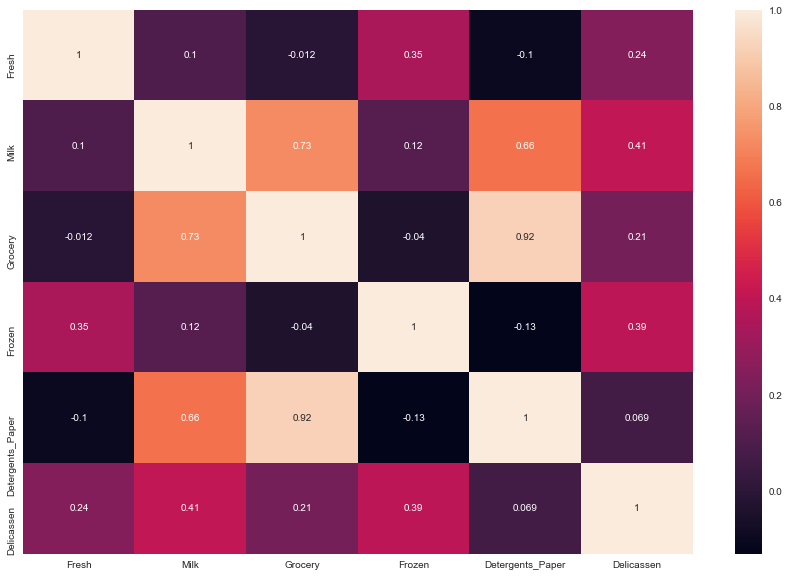

In [1086]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(15,10)) 
# generating correlation heatmap 
sns.heatmap(df.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show()

# Distribution of Continous Variables

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')
Continuous Variables Visualization 



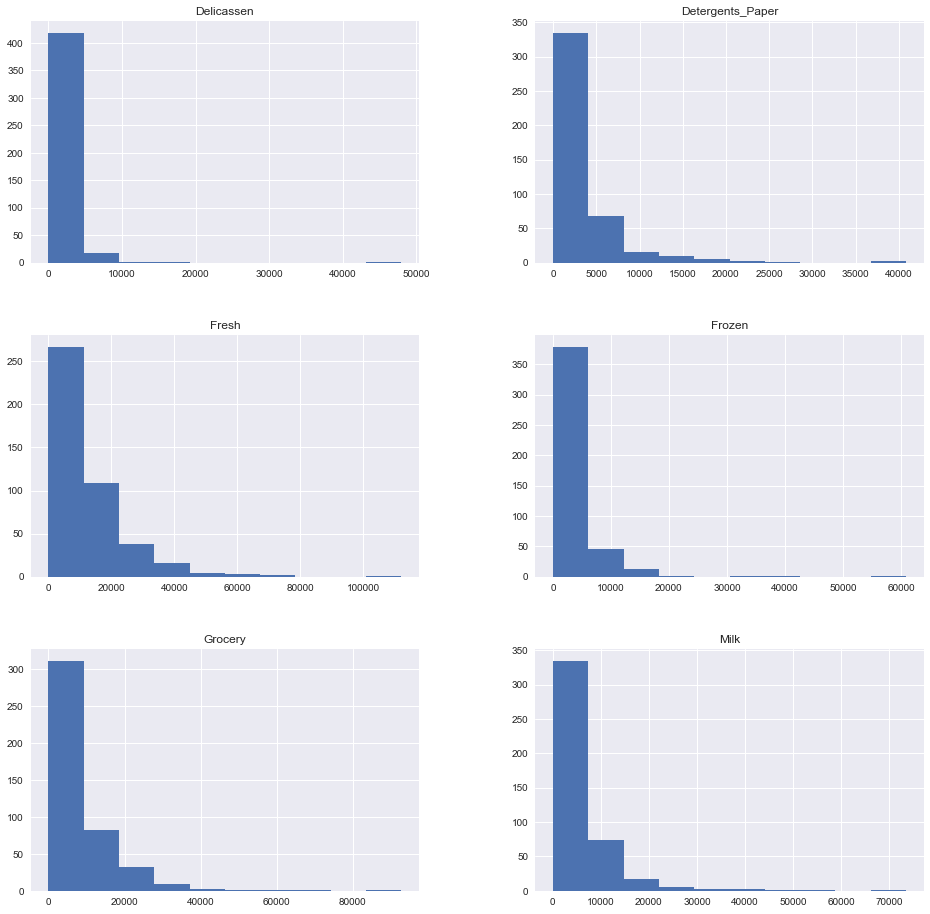

In [1087]:
continous_vars=df.describe().columns
print(continous_vars)

print("Continuous Variables Visualization","\n")
df.hist(column=continous_vars,figsize=(16,16))
plt.show()

### Check for outliers

In [1088]:
def continous_data(i):
    if df[i].dtype!='object':
        print('--'*50)
        sns.boxplot(df[i])
        plt.title("Boxplot of "+str(i))
        plt.show()

----------------------------------------------------------------------------------------------------


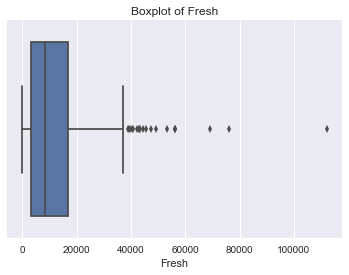

----------------------------------------------------------------------------------------------------


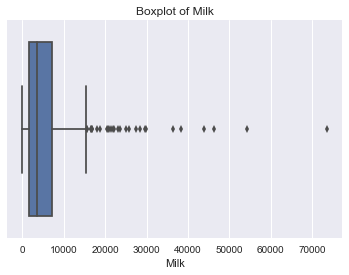

----------------------------------------------------------------------------------------------------


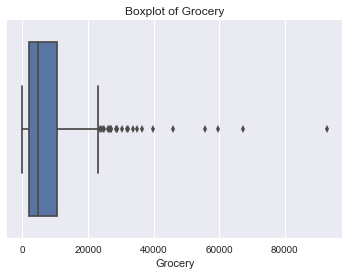

----------------------------------------------------------------------------------------------------


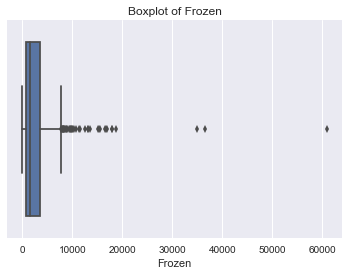

----------------------------------------------------------------------------------------------------


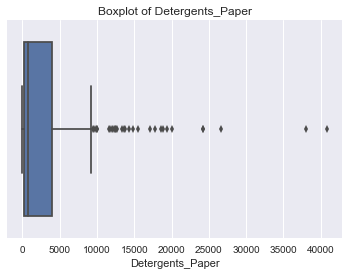

----------------------------------------------------------------------------------------------------


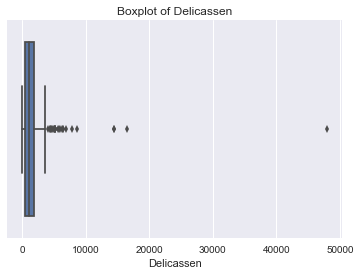

In [1089]:
sns.set() #Sets the default seaborn style
j=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for k in j:
    continous_data(i=k)

# Replace outlier values with median values

In [1090]:
for k in list(continous_vars):
    IQR = np.percentile(df[k],75) - np.percentile(df[k],25)
    
    Outlier_top = np.percentile(df[k],75) + 1.5*IQR
    Outlier_bottom = np.percentile(df[k],25) - 1.5*IQR
    
    df[k] = np.where(df[k] > Outlier_top,np.percentile(df[k],50),df[k])
    df[k] = np.where(df[k] < Outlier_bottom,np.percentile(df[k],50),df[k])

------------------------------------------------------------------------------------------------------------------------


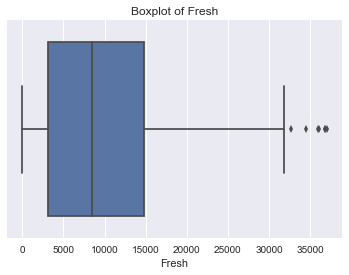

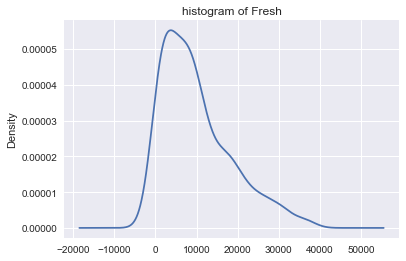

------------------------------------------------------------------------------------------------------------------------


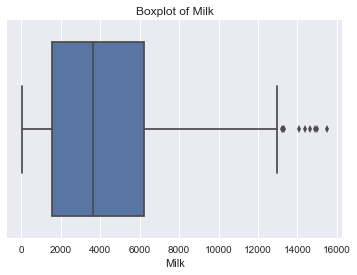

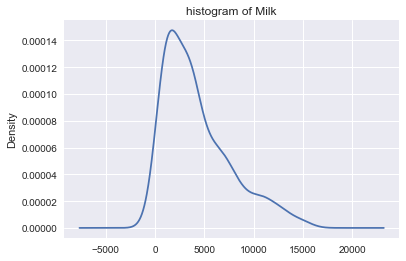

------------------------------------------------------------------------------------------------------------------------


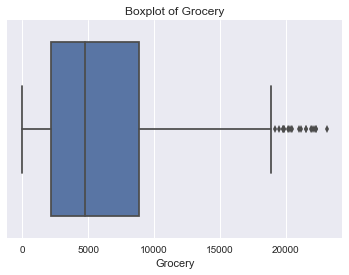

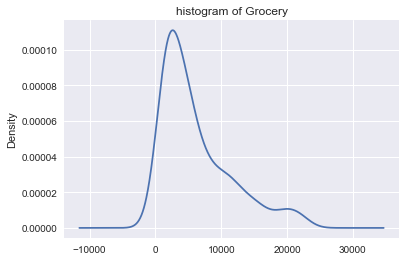

------------------------------------------------------------------------------------------------------------------------


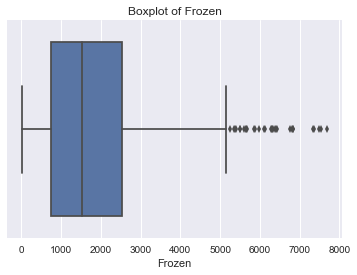

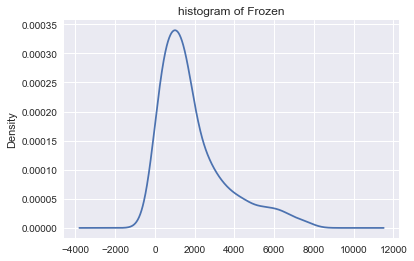

------------------------------------------------------------------------------------------------------------------------


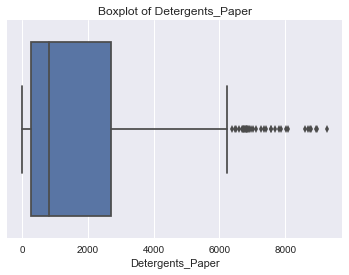

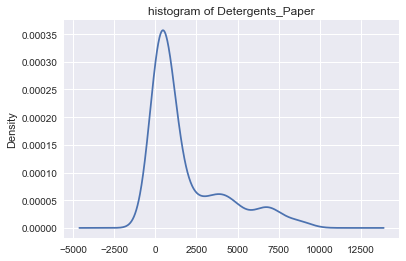

------------------------------------------------------------------------------------------------------------------------


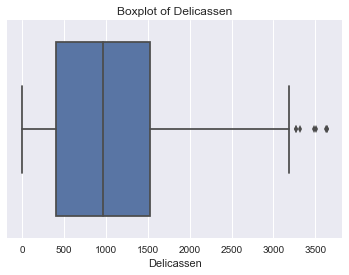

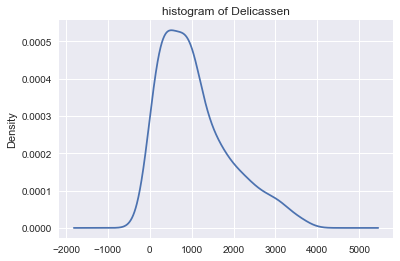

In [1091]:
def continous_data(i):
    if df[i].dtype!='object':
        print('--'*60)
        sns.boxplot(df[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))
        df[i].plot.kde()
        plt.show()
        plt.clf()

for k in j:
    continous_data(i=k) 

## Scale Data

In [1092]:
df_std=df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

In [1093]:
min_max_scaler=preprocessing.MinMaxScaler()
df_std=pd.DataFrame(min_max_scaler.fit_transform(df_std),columns=continous_vars)

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')
Continuous Variables Visualization 



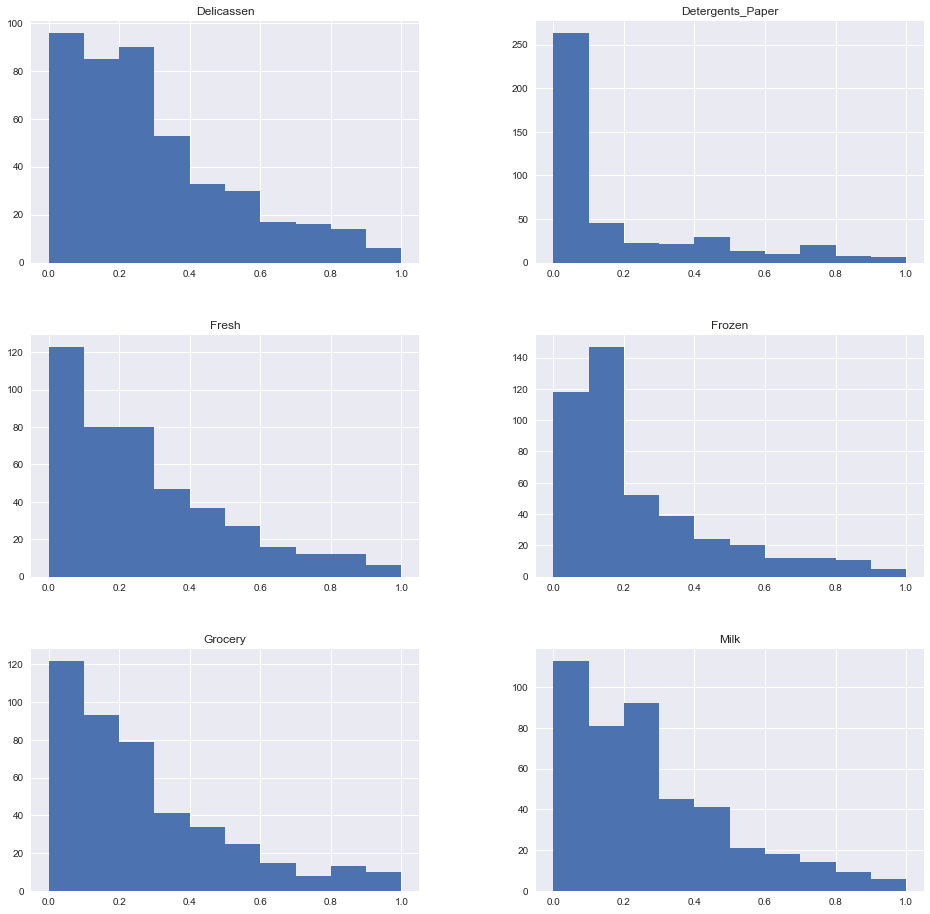

In [1094]:
continous_vars=df_std.describe().columns
print(continous_vars)

print("Continuous Variables Visualization","\n")
df_std.hist(column=continous_vars,figsize=(16,16))
plt.show()

In [1095]:
#df  =  pd.concat([df[['Channel','Region']],df_std],axis=1)

In [1096]:
df_std.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.342019,0.622108,0.326847,0.024680,0.288383,0.367364
1,0.190479,0.632087,0.413640,0.226822,0.355215,0.487892
2,0.171469,0.567161,0.332166,0.310786,0.379292,0.264860
3,0.358113,0.073932,0.182408,0.832985,0.054416,0.491194
4,0.610591,0.346984,0.311149,0.507966,0.191535,0.264860


# K Means Clustering 

In [1097]:
#X=df.iloc[:,2:].values
X=df_std.values

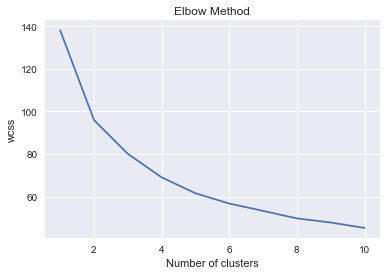

In [1098]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [1099]:
km4=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
labels = km4.labels_

In [1100]:
df['clusters']=km4.predict(X)

In [1101]:
df.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,Retail,other,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,0
1,Retail,other,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0
2,Retail,other,6353.0,8808.0,7684.0,2405.0,3516.0,965.5,0
3,Horeca,other,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,2


In [1102]:
print (df.groupby('clusters')['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'].median())

            Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
clusters                                                                
0          3913.0  7739.5  12473.0   976.0            5100.0      1050.0
1          7291.0  1916.0   2530.0  1483.0             402.0       572.0
2         17623.0  3944.0   4955.0  1526.0             763.0      1886.0


Text(0.5,0.92,'K Means')

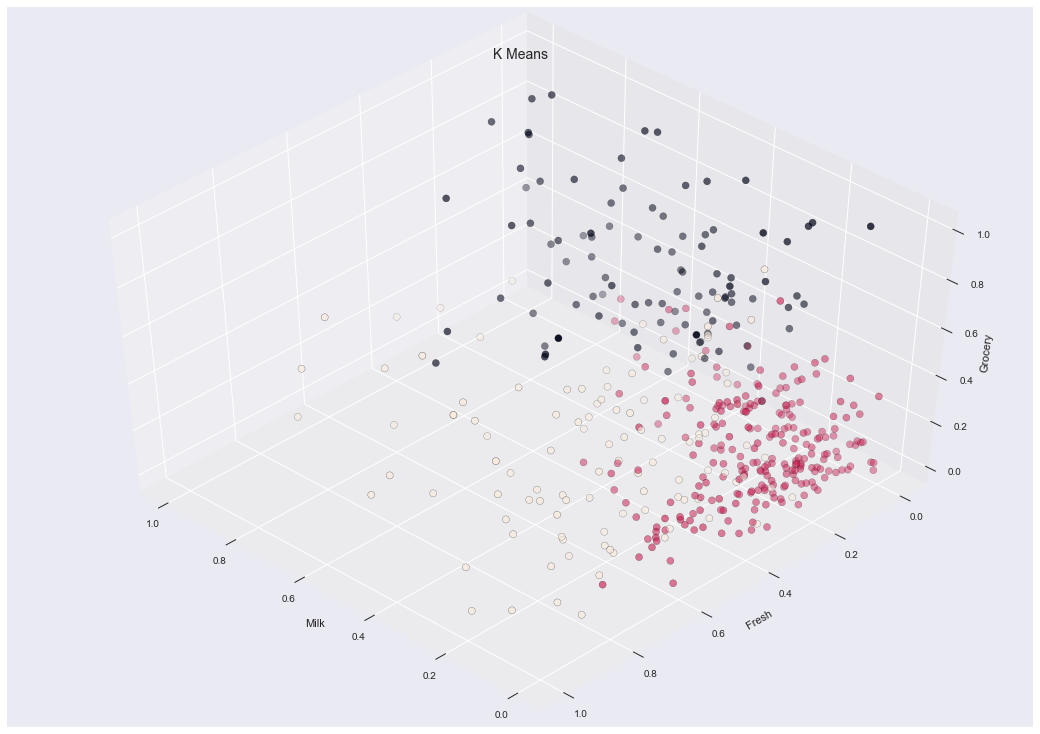

In [1103]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(15,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 1], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Milk")
ax.set_ylabel("Fresh ")
ax.set_zlabel("Grocery")
##'Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'

plt.title("K Means", fontsize=14)

# Fresh 

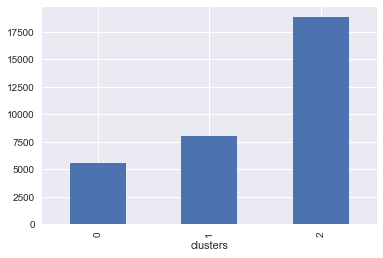

In [1104]:
df.groupby('clusters').Fresh.mean().plot(kind='bar')

# Milk

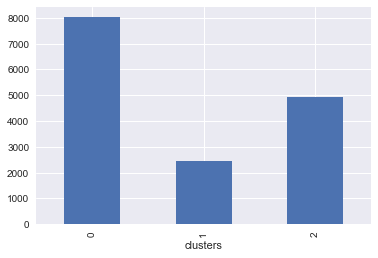

In [1105]:
df.groupby('clusters').Milk.mean().plot(kind='bar')

# Grocery

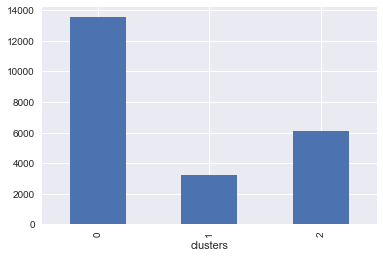

In [1106]:
df.groupby('clusters').Grocery.mean().plot(kind='bar')

# Frozen

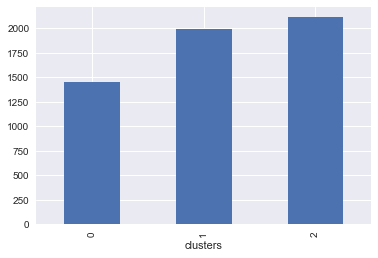

In [1107]:
df.groupby('clusters').Frozen.mean().plot(kind='bar')

# Detergents_Paper

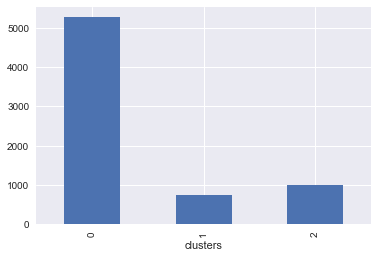

In [1108]:
df.groupby('clusters').Detergents_Paper.mean().plot(kind='bar')

# Delicassen

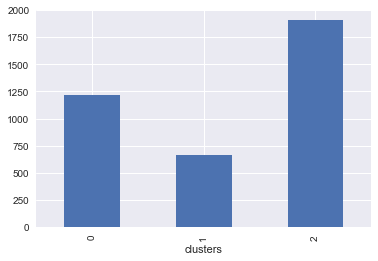

In [1109]:
df.groupby('clusters').Delicassen.mean().plot(kind='bar')